# Module 3
# Fourier analysis

<img src="img/Rainbow_Olivia.png" width="360">
Rainbow
<img src="img/WhiteLightPrism.jpeg" width="240">

<img src="img/Fourier.jpg" width="240">

(Jean-Baptiste) Joseph Fourier (1768-1830) came up with the concept that piecewise continuous function $y(t)$ that is periodic (period $T$, ie $y(t+T)=y(t)$, can be decomposed as sum of cosines and sines.  

## Trigonometric Fourier series

Fourier series is an expansion of a periodic function into an infinite sum of sine and cosine functions. 

The __Fourier Series__ can be written as:

\begin{align*}
y(t) & = \frac{A_0}{2} + \sum_{n=1}^{\infty} \left( A_n \cos \left(\frac{n 2\pi t}{T}\right) + B_n \sin \left(\frac{n 2\pi t}{T}\right) \right) \\
  & = \frac{A_0}{2} + \sum_{n=1}^{\infty} \left( A_n \cos \left(n \omega_0 t \right) + B_n \sin \left( n \omega_0 t\right) \right)
\end{align*}

where the Fourier coefficients are:

\begin{align*}
A_0 & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) dt\\
A_n & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) \cos \left(\frac{2 \pi n t}{T} \right) dt\\
B_n & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) \sin \left(\frac{2 \pi n t}{T} \right) dt
\end{align*}

The notations can be simplified by introducing:

- __Fundamental harmonic__: $n=1$, noted $\omega_0=2\pi/T$.

- Frequencies of $\sin$ and $\cos$ are multiple of the fundamental frequency $\omega$: __$n^{th}$ harmonic__.

- $A_n$, $B_n$: Fourier coefficients

- $A_0/2$: mean of the function

__Fourier analysis__ finding the Fourier amplitudes for a periodic function $y(t)$, or decomposing the function (a complex signal) in sum of harmonics (simple periodic sine wave).


_example_

> What are the Fourier coefficients of the function:
\begin{align*}
y(t) = 3 + 2.4 \sin t + 5.2 \sin 4t
\end{align*}

> What is the fundamental frequency and fundamental period in seconds.

Simple simplications can be seen in the Fourier series depending on the nature of the function (ie odd or even).

_example_

>Find the frequency content (or spectrum) of the square function:
\begin{align*}
y(t) = &  -A \; &-\pi \leq t<0\\
     & A \; &0 \leq t < \pi
\end{align*}

This is an odd function: $A_0 = A_n = 0$.
\begin{align*}
B_n & = \frac{2A}{n\pi} \left( 1 - \cos(n\pi) \right)\\
& = \frac{4A}{n\pi} \, \text{for} \, n\,\text{odd}\\
& = 0 \, \text{for} \, n\,\text{even}
\end{align*}

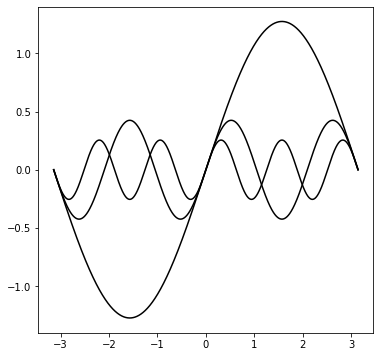

In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline

# let's plot each harmonics
t = numpy.linspace(-3.14159,3.14159,num=10000)

n=3
A=1
fig = pyplot.figure(figsize=(6,6))
for i in range(1,n+1):
    y = 4*A/numpy.pi/(2*i-1)*numpy.sin((2*i-1)*t)
    pyplot.plot(t, y, color='k', linestyle='-')


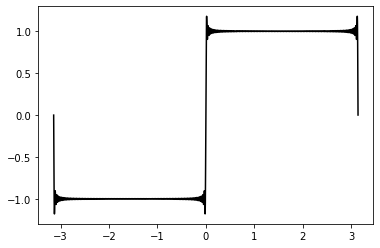

In [8]:
# let's now plot the reconstructed signal

def FourierSeriesSquare(n,t,A):
    ''' Calculate the Fourier series for square wave making use of notation
    fn = (2n-1) f1
    Arguments
    ---------
    n: number harmonics to plot 
    t: time
    A: amplitude of square wave
    Returns
    -------
    y : Fourier series of square function.
    '''    
    y = 0
    for i in range(1,n+1):
        y = y + 1/(2*i-1)*numpy.sin((2*i-1)*t)
   
    y_out = 4*A/numpy.pi*y

    return y_out

y_sq = FourierSeriesSquare(100,t,A)

pyplot.plot(t, y_sq, color='k', linestyle='-');

Another plot that is interesting is to plot the spectrum of the signal.  This is the amplitude associated with each harmonic components.  For the square wave above, this looks like:

Could you think of an application where this would highly relevant and useful?

## Exponential Fourier series
By using complex number notation, one can greatly simplify the notation of the Fourier series. Remember that (with $i^2=-1$):
\begin{align*}
e^{i \theta} = \cos \theta + i \sin \theta
\end{align*}
and
\begin{align*}
\cos \theta & =  \frac{1}{2} \left( e^{ i  \theta} + e^{-i\theta} \right)\\
\sin \theta & =  \frac{1}{2i} \left( e^{i  \theta} - e^{-i\theta} \right)
\end{align*}

Substituting the complex exponential definitions of $\cos$ and $\sin$ in the trigonometric Fourier series leads to:
\begin{align*}
y(t) = \sum_{n=-\infty}^\infty C_n e^{in\omega_0t}
\end{align*}
where
\begin{align*}
C_0 & = \frac{A_0}{2}\\
C_n & = \frac{1}{T} \int_{-T/2}^{T/2} y(t) e^{-in\omega_0 t} dt 
\end{align*}

The Fourier transform coefficients are complex numbers.  To compare the relative importance of all the components, one uses the magnitude, or amplitude, of the complex number, this is also called the modulus.  If $z = x + i y$, then the amplitude of $z$ is : $|z| = \sqrt{x^2 + y^2}$.  

\begin{align*}
C_n & = A_n + i B_n
\end{align*}


## Continuous Fourier transform

The Fourier transform is an extension of the Fourier series and is applicable to aperiodic signals.  In this case the period is treated as being infinite. Therefore a Fourier transform will decomponse a signal into oscillatory functions and will create a correspondance of the signal between the time and frequency domain. 

By extending the period to infinity, the fundamental frequency (the lowest frequency) tends towards zero.  Therefore, the frequency becomes a continuous function.  This is the fundation to the __Fourier transform__ $Y(\omega)$ of a function $y(t)$.

\begin{align*}
Y(\omega) = \int_{-\infty}^\infty y(t) \mathrm{e}^{-i\omega t} dt
\end{align*}

$Y(\omega)$ is a continuous, complex function.  One can recover the function $y(t)$ from the Fourier transform through the __inverse Fourier transform__.

\begin{align*}
y(t) = \frac{1}{2\pi} \int_{-\infty}^\infty Y(\omega) \mathrm{e}^{i\omega t} d\omega
\end{align*}

### Properties of the continuous Fourier transform:

\begin{array}{l l l}
y(t) & Y(\omega) & \text{property}\\
\hline
\alpha y_1(t) + \beta y_2(t) & \alpha Y_1(\omega) + \beta Y_2(\omega) & \text{linearity}\\
y(t-t_0) & Y(\omega)e^{-i\omega t_0} & \text{time shifting}\\
y(t)e^{i\omega_0 t} & Y(\omega - \omega_0) & \text{frequency shifting}\\
y(at) & \frac{1}{|a|} Y(\frac{\omega}{a}) & \text{time scaling}\\
\frac{dy}{dt} & i\omega Y(\omega) & \text{differentiation}\\
\int_{\infty}^t y(\tau) d\tau & \pi Y(0) \delta(\omega) + \frac{1}{i \omega} Y(\omega) & \text{integration}\\
y_e(t) & Re[Y(\omega)] = A(\omega) & \text{even signal}\\
y_o(t) & i Im[Y(\omega)] = i B(\omega) & \text{odd signal}\\
y_1(t) y_2(t) & \frac{1}{2\pi} Y_1(\omega) * Y_2(\omega) & \text{multiplication}\\
y_1(t) * y_2(t) & Y_1(\omega)  Y_2(\omega) & \text{convolution}
\end{array}

## Discrete Fourier transform

In experiment where the signal is sampled with digital data acquisition boards, the signal is finite and discrete in time.  For analyzing the data spectrum a modified version is the continuous Fourier transform is used: the discrete Fourier transform (DFT).  

\begin{align*}
Y(k \Delta f) = \sum_{n=0}^{N-1} y(n \Delta t) e^{-i (2\pi k \Delta f)(n\Delta t)} \qquad k = 0,\,1,\,2, \dots , \, N-1
\end{align*}
with:

\begin{array}{ll}
N & \text{number of samples taken over sampling interval $T_s$}\\
T_s & T_s = N\Delta t\quad\text{total sampling time}\\
\Delta f & \text{frequency increment}\\
 & \Delta f = 1/T_s\\
\Delta t & \text{time increment (or sampling period)}\\
 & \Delta t = T_s/N\\
f_s & \text{sampling rate}\\
 & f_s = 1/\Delta t = N/T_s
\end{array}

$Y$'s are complex coefficients with frequencies $0,\, \Delta f,\, 2\Delta f, \, 3\Delta f, \dots , \, (N-1)\Delta f$. They represents the frequency of the sinusoidal functions associated with the coefficients.  The coefficients are the amplitudes associated with each frequency.

Only the frequencies between 0 and $(N/2-1)\Delta f$ are contributing information to the DFT, the other frequencies are redundant.  This is related to the __Nyquist Shannon sampling rate theorem__ that discards frequencies above half of the sampling rate, ie $f<f_s/2 =N/2T = N/2 \Delta f$ to avoid aliasing; $f_{folding} = f_s/2$ is known as the __Nyquist__ or __folding frequency__.

By using the inverse DFT, one recovers the original signal from the DFT:
\begin{align*}
y(n \Delta t) = \frac{1}{N} \sum_{k=0}^{N-1} Y(k \Delta f) e^{i (2\pi k \Delta f)(n\Delta t)} \qquad n = 0,\,1,\,2, \dots , \, N-1
\end{align*}

The computational cost to calculate the $Y$'s is about $N^2$, which for large datasets can be prohibitively expensive.  Instead a fast algorithm has been developed to compute the $Y$'s in only $N\log_2 N$ computations: the __fast Fourier transform__, __FFT__.  For the FFT to be efficient the total number of samples should be a power of 2, i.e. $N=2^m$, where $m$ is an integer. FFT are typically programmed into most scientific softwares.

_example_

> Voltage data are acquired with a digital data acquisition system at $f_s = 2^{10}\,\mathrm{Hz} = 1024\,\mathrm{Hz}$. 2048 data points are taken.  A FFT is performed, and a frequency spectrum plot is generated.  Calculate the following:

> 1. Total sampling time

> 2. The folding frequency of the resulting frequency spectrum

> 3. The frequency resolution of the resulting frequency spectrum


Let's examine some properties of the discrete Fourier transform.  Let's start with a simple function for which we know the spectra well.
\begin{align*}
y(t) = 2.00 \sin (2\pi 5 t) + 3.00 \sin (2\pi 8 t)
\end{align*}
Without calculating anything you expect the spectra to have two peaks at 5 and 8 Hz.  Let's use FFT command in python to calculate it.  Note that to make the FFT algorithm more efficient we took $N=2^{8}=256$ for the vector $t$.

The Fourier transform coefficients are complex numbers.  To compare the relative importance of all the components, one uses the magnitude, or amplitude, of the complex number, this is also called the modulus.  If $z = x + i y$, then the amplitude of $z$ is : $|z| = \sqrt{x^2 + y^2}$.  


N =  1024
\Delta f =  0.02  Hz


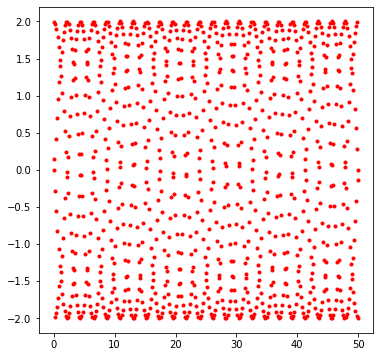

In [13]:
import numpy
from matplotlib import pyplot
%matplotlib inline

# let's plot each harmonics
f = 5 # Hz
f_s = 20.48 # Hz
# T_s = 2/f # s
N = 1024 # # points
T_s = N/f_s # s
t = numpy.linspace(0,T_s,num=N)
fig = pyplot.figure(figsize=(6,6))
y = 2.00*numpy.sin((2*numpy.pi*f)*t)
pyplot.plot(t, y, 'r.');
print('N = ', N)
print('\Delta f = ', 1/T_s, ' Hz')

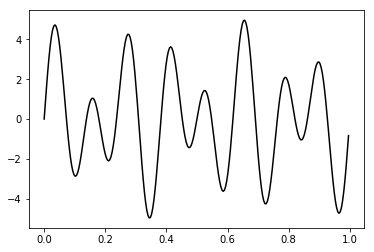

In [39]:
m = 8 # exponent number of point
N = 2**m # number of points
Ts = 1. # sampling interval (s)
timestep = Ts/N
t = numpy.arange(0,Ts,timestep) # time vector
y_t = 2*numpy.sin(2*numpy.pi*5*t)+3*numpy.sin(2*numpy.pi*8*t)
pyplot.plot(t, y_t, 'k-');

256.0


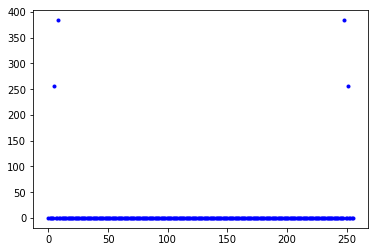

In [40]:
sp = numpy.fft.fft(y_t) # compute FFT 
pyplot.plot(abs(sp),'b.');
f_s = 1/timestep
print(f_s)

One sees that the FFT is symmetric with respect to $f_s/2$, remember the Shannon sampling rate theorem.  Now let's only take one half of the coefficient with frequencies below the Nyquist frequency $f_s/2$.

parameters: N = 256, Ts = 3.60 s, \Delta t = 0.0141 s, fs = 71.11 Hz
parameters: \Delta f = 0.2778 Hz
18.0
4.444444444444445 4.722222222222222


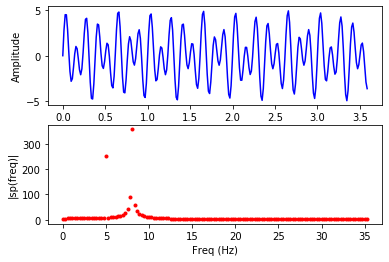

In [29]:
m =  8 # exponent number of point
N = 2**m # number of points
Ts = 3.6 # sampling interval (s)
timestep = Ts/N # time increment (s)
fs = 1/timestep # sampling frequency (Hz)
delta_f = 1/Ts
print('parameters: N = {:.0f}, Ts = {:.2f} s, \Delta t = {:.4f} s, fs = {:.2f} Hz'.format(N,Ts,timestep,fs))
print('parameters: \Delta f = {:.4f} Hz'.format(delta_f))
t = numpy.arange(0,Ts,timestep) # time vector
y_t = 2*numpy.sin(2*numpy.pi*5*t)+3*numpy.sin(2*numpy.pi*8*t)
sp = numpy.fft.fft(y_t) # compute FFT 

k = numpy.arange(int(N))
frq = k/Ts # two sides frequency range
frq = frq[range(int(N/2))] # one side frequency range
sp = sp[range(int(N/2))]

fig, ax = pyplot.subplots(2, 1)
ax[0].plot(t,y_t,'b-')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(sp),'r.') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|sp(freq)|');
print(5/delta_f)
print(16*delta_f, 17*delta_f)

As you can see, one expect to see only two components at 5 and 8 Hz, however, the adjacent frequencies have some signal associated with them.  

ALIASING

_Exercise_
>Let's play with the parameters of the FFT (number of points and sampling interval length) to see if we can improve the signal. 

> Vary the total sampling time between 1.1, 3.3 and 10.1 s as well as the number of points between $2^6 = 64, 2^8 = 256, 2^{12} = 4096$.  For each case (9 total) comment on the shape of time and spectral signals.  

> Which combination gives you the best time signal and which one the best spectra?

> Try now to take $T_s = 1$ s and $N=64\, \& \, 256$ points.  What do you observe? 

Except for the last cases, in the spectral domain, we do not obtain a perfect answer.  This is called __leakage__.  If the total sampling period is not a mulitple of the period in the signal, then the time signal over which we perform the FFT is not periodic: it does not end and start at ''consecutive points''.  This also means that of the various frequencies over which we calculate the Fourier coefficients, none corresponds exactly to the frequencies of the signal and therefore the energy content associated with each harmonic has to be spread over several frequencies.  

Leakage can be prevented by selecting a sampling period that is a multiple of the periods of the signal.  This implies that we do know the signal already, which in most application is not the case.  It can be minimized by increasing the frequency resolution.

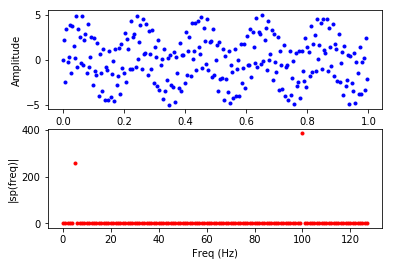

In [42]:
m = 8 # exponent number of point
N = 2**m # number of points
Ts = 1. # sampling interval (s)
timestep = Ts/N
t = numpy.arange(0,Ts,timestep) # time vector
y_t = 2*numpy.sin(2*numpy.pi*5*t)+3*numpy.sin(2*numpy.pi*100*t)
sp = numpy.fft.fft(y_t) # compute FFT 

k = numpy.arange(int(N))
frq = k/Ts # two sides frequency range
frq = frq[range(int(N/2))] # one side frequency range
sp1 = sp[range(int(N/2))]

fig, ax = pyplot.subplots(2, 1)
ax[0].plot(t,y_t,'b.')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(sp1),'r.') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|sp(freq)|');

_In summary_: in time domain, the higher the sampling rate, the closer the digitized signal will look to the analog.  In other words we want a small time increment, $\Delta t$, to have a high temporal resolution.

In the spectral domain, to obtain a faithful spectra (with no leakage) we want to minimize the sampling rate (while still respecting Nyquist Shannon sampling theorem) and increase the number of points acquired.  In othe words, we want a small frequency increment $\Delta f$ to have a high frequency resolution.  
\begin{align*}
\Delta f = \frac{1}{N \Delta t}
\end{align*}

We are going to see another approach to minimize leakage.

ADD DISCUSSION OF TIME AND FREQUENCY RESOLUTION MAKING ANALOGY BETWEEN FREQUENCY AND TIME AND SHOWING GRAPHICALLY THE TIME AND FREQUENCY INCREMENTS AND HOW THEY RELATE TO $f_S$ AND $T_s$.  USE THIS TO EXPLAIN HOW WE WILL MISS THE PEAKS OF FUNCTIONS (REGARDLESS OF TIME OR FREQUENCY DOMAINS) IF WE DO NOT SAMPLE EXACTLY AT THE RIGHT TIME. 

## Windowing

If the sampling period is not a multiple of the signal period, then practically, the signal ends and start at different instant in the cycle, forcing to use multiple frequencies to fit the spectra.  Apart from selecting a perfect FFT, one can also give less weight to the beginning and end points of the time signal by using a weighting or __windowing__ function.  There exists many windowing functions for FFT.  Here we are going to see one, the Hann window:

\begin{align*}
w(n) = \frac{1}{2} \left( 1 - \cos \left( \frac{2\pi n}{N-1} \right) \right)
\end{align*}

<img src="img/HannWindow.png" width="240">

<img src="img/WindowedData.png" width="480">

<img src="img/SpectraOriginal.png" width="240">

<img src="img/SpectraHann.png" width="240">


## Displaying of spectra

### Spectra normalization

When using FFT to compute spectra, one needs to normalize the results to recover the amplitude of each spectral component.  This is done by multiplying the results by $2/N$.  See the example below where we use the same function:

\begin{align*}
y(t) = 2.00 \sin(2\pi 5 t) + 3.00 \sin (2 \pi 8 t)
\end{align*}

You can recognize right away that the function takes the shape of a trigonometric Fourier series:
\begin{align*}
y(t) = \frac{A_0}{2} + \sum_{n=1}^{\infty} \left( A_n \cos \left(\frac{2\pi nt}{T}\right) + B_n \sin \left(\frac{2\pi nt}{T}\right) \right)
\end{align*}
With fundamenal frequency $f = 1$ Hz.

With $A_n = 0$, $B_5 = 2.00$, and $B_8 = 3.00$.

Let's see what happens when we plot the spectra by taking the norm of the FFT coefficients.

parameters: N = 256, Ts = 10.00 s, \Delta t = 0.0391 s, fs = 25.60 Hz


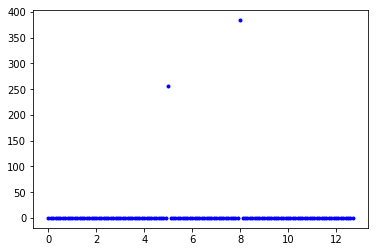

In [43]:
m =  8# exponent number of point
N = 2**m # number of points
Ts = 10 # sampling interval (s)
timestep = Ts/N # time increment (s)
fs = 1/timestep # sampling frequency (Hz)
print('parameters: N = {:.0f}, Ts = {:.2f} s, \Delta t = {:.4f} s, fs = {:.2f} Hz'.format(N,Ts,timestep,fs))
t = numpy.arange(0,Ts,timestep) # time vector
y_t = 2*numpy.sin(2*numpy.pi*5*t)+3*numpy.sin(2*numpy.pi*8*t)
sp = numpy.fft.fft(y_t) # compute FFT 

k = numpy.arange(int(N))
frq = k/Ts # two sides frequency range
frq = frq[range(int(N/2))] # one side frequency range
sp1 = sp[range(int(N/2))]

pyplot.plot(frq,abs(sp1),'b.'); # plotting the spectrum

The amplitudes are $C_{5 \text{Hz}} = 256$ and $C_{8 \text{Hz}} = 384$.

If we now normalize the coefficient by $2/N$ we recover the expected amplitudes.

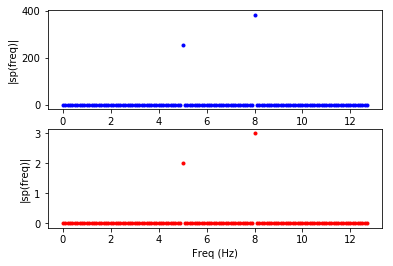

In [44]:
fig, ax = pyplot.subplots(2, 1)
ax[0].plot(frq,abs(sp1),'b.') # plotting the spectrum
ax[0].set_xlabel('Freq (Hz)')
ax[0].set_ylabel('|sp(freq)|');
ax[1].plot(frq,abs(sp1)*2/N,'r.') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|sp(freq)|');

Let's now look how to recover the original data in the time domain from the spectral data by taking the inverse FFT.  For convnience, let's take the data just above, this way we can see the effect of leakage on the reconstruction.

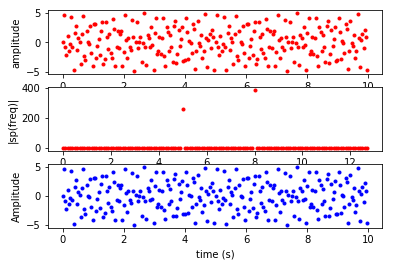

In [45]:
isp = numpy.fft.ifft(sp) # Computer inverse FFT, here we have to take ALL the frequencies

fig, ax = pyplot.subplots(3, 1)
ax[0].plot(t,y_t,'r.')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('amplitude')
ax[1].plot(frq,abs(sp1),'r.')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|sp(freq)|')
ax[2].plot(t, isp.real,'b.') # plotting the IFFT (keeping only real part, imaginary should be 0 anyway).
ax[2].set_xlabel('time (s)')
ax[2].set_ylabel('Amplitude');

### Power Spectral Density

In spectral analysis it is typical to not plot the amplitude of the coefficients, but the power associated with each harmonic, ie plotting the square of the coefficients.  Data are also often plotted on a log scale with the results expressed in dB.

In practice, some signals can be very long (minutes or longer).  While this will lead to very high frequency resolution. In practice, this resolution is often not needed and leakage will minimize the spectral resolution.  It is therefore common to split the signal into segments of equal length, due the FFT on each segments, and then average the spectra.  The loss in frequency resolution is compensated by the gain in smoother spectra due to the averaging process.  This procedure leads to the power spectral density, PSD. When the segments are overlapped (typically by 50\%), this is called Welch's method.  It is typically programmed into modern scientific data analysis software.

<img src="img/PSD_fft_Vy.png" width="600">

Here data on the left are the PSD with Welch's method, while data on the right are just the FFT of the time series.  You can see that the spectra becomes much smoother when it is ''averaged'' in this manner.


## Nyquist Shannon sampling rate theorem

For signals of finite bandwidth, the Nyquist Shannon sampling rate theorem sets a sufficient condition on sampling frequency to transform a continuous (analog) signal into a discrete (digital) signal without any loss of information.  The theorem applies to functions that are continuous and have a Fourier transform.  It also set a methodology to fully reconstruct an analog signal from discretly sampled data.

The Nyquist Shannon sampling rate thereom states:

>_If a function, $y(t)$, contains no frequencies greater than $f_{signal}(MAX)$, it is completely determined if it is sampled with a sampling frequency $f_s$ such that:_
\begin{align*}
f_s > 2 f_{signal}(MAX)
\end{align*}

The limit $f_s/2$ is called the __Nyquist frequency__.  In other words, to fully capture $y(t)$, the sampling frequency must exceed twice the highest frequency in the signals.  The condition sets by the inequality above is also refered to as the __Nyquist criterion__.

The theorem also set a methodology to fully reconstruct an analog signal from discretly sampled data with cardinal series (will see them below).


## Aliasing and filtering
### Aliasing
In selecting the sampling rate, one must always remember to respect the Nyquist-Shannon sampling rate theorem.  Otherwise the measured frequency will be erroneous, this is called __aliasing__.

_exercise_

>The sine function below as frequency $f=60$ Hz.  Vary the sampling frequency, $f_s$ between 30, 45, 60, 90, 120, 125, and 200 Hz.  For each sampling frequency, note the apparent frequency, $f_a$, from the spectrum.  



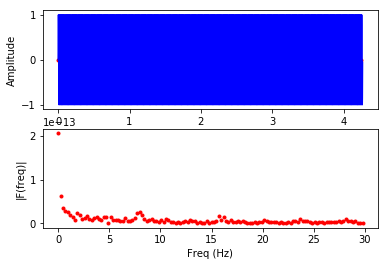

In [62]:
ff = 60 # signal frequency (Hz)
fs = 60 # sampling frequency (Hz)

m = 8 # exponent number of point
N = 2**m # number of points
Ts = N/fs # sampling period
timestep = 1/fs # time increment (s)
t = numpy.arange(0,Ts,timestep) # time vector
y_t = 1*numpy.sin(2*numpy.pi*ff*t)

#prepare analog looking function
t1 = numpy.arange(0,Ts,timestep/100) # time vector
y_t1 = 1*numpy.sin(2*numpy.pi*ff*t1)

Y = numpy.fft.fft(y_t) # compute FFT 

k = numpy.arange(int(N))
frq = k/Ts # two sides frequency range
frq = frq[range(int(N/2))] # one side frequency range
Y = Y[range(int(N/2))]

fig, ax = pyplot.subplots(2, 1)
ax[0].plot(t,y_t,'r.')
ax[0].plot(t1,y_t1,'b-')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y)*2/N,'r.') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|F(freq)|');

From the graphs above, one sees that if the Nyquist Shannon sampling rate theorem is not respected, the perceived signal will have a very different spectra than the real signal. This will lead to erroneous data.  

> We will have aliasing if $f_s \ngtr 2f_{signal}(MAX)$.

In general, the perceived (or apparent) frequency, $f_a$, of a signal of frequency $f$ can be expressed as:
\begin{align*}
f_a =  \left| f - f_s \cdot \mathrm{NINT}\left( \frac{f}{f_s} \right) \right|
\end{align*}

Where $\mathrm{NINT}$ is the nearest integer function.

_example_

> Calculate the perceived frequency for the following signals and check your results by running the python script above.

>> $f = 100$ Hz, $f_s = 205$ Hz $\rightarrow$, aliasing?  $f_a = \quad $ Hz.

>> $f = 100$ Hz, $f_s = 200$ Hz $\rightarrow$, aliasing?  $f_a = \quad $ Hz.

>> $f = 100$ Hz, $f_s = 100$ Hz $\rightarrow$, aliasing?  $f_a = \quad $ Hz.

>> $f = 100$ Hz, $f_s = 500$ Hz $\rightarrow$, aliasing?  $f_a = \quad $ Hz.

>> $f = 100$ Hz, $f_s = 105$ Hz $\rightarrow$, aliasing?  $f_a = \quad $ Hz.

> A voltage signal has a 1.50 V DC component and two periodic components:

> Frequency $f_1$ = 115 Hz, amplitude $A_1$ = 2.00 V &
 Frequency $f_2$ = 560 Hz, amplitude $A_2$ = 0.20 V

>The data are sampled digitally at 1024 Hz, taking 256 data points.

>(a) Is there aliasing? If so, calculate $f_a$.

>(b) Calculate the frequency resolution and sketch the frequency spectrum


_Summary_

When acquiring digital signals one has to compromize between two needs: minimizing sampling rate to optimize frequency resolution, without running afoul of the Nyquist Shannon sampling rate theorem.

### Anti-aliasing filter
When acquiring a digital signal it is good practice to add a low-pass filter in the system, such that any frequencies above of the folding frequency are suppressed.  This prevents the apparance of erroneous frequencies in the signal that might lead to misinterpretation of the results.  This low pass filter is called an anti-aliasing filter and this step is part of the __signal processing__ block of the measurement block diagram.  We will see low-pass filters soon after we review the fundamental of electronics and will determine rules to set up the order of the anti-aliasing filter as well as its cut-off frequency.

### Magnitude and phase

For the sake of conciseness, we will use the continuous Fourier transform notation, but this is also valid for other form of Fourier series and transforms.  Recall the continuous Fourier transform:
\begin{align*}
Y(\omega) = \int_{-\infty}^\infty y(t) \mathrm{e}^{-i\omega t} dt
\end{align*}
and the inverse Fourier transform.
\begin{align*}
y(t) = \frac{1}{2\pi} \int_{-\infty}^\infty Y(\omega) \mathrm{e}^{i\omega t} d\omega
\end{align*}

The coefficients $Y(\omega)$ are complex numbers.  Note that if $y(t)$ is real, which would be our case most of the times, then the imaginary part of the negative frequency harmonics ($\mathrm{e}^{i\omega t}\, \text{for}\,\omega<0$) cancel out the imaginary part of the positive harmonics ($\mathrm{e}^{i\omega t}\, \text{for}\,\omega>0$).

> In __rectangular complex coordinate__ (not often used in signal processing):
\begin{align*}
Y(\omega) = \Re{Y(\omega)} + i \Im{Y(\omega)}
\end{align*}
The coefficients $\Re{Y(\omega)}$ and $\Im{Y(\omega)}$ are real.  They correspond to amplitudes associated with the $\cos$ and $\sin$ funcions of trigonometric transform, respectively.  In other words, they are the equivalent of the $A_n$ and $B_n$ coefficients seens for Fourier series.

> In __polar comnplex coordinate__ (the prefered convention for signal processing), it is more intuitive to represent the complex Fourier coefficients:
\begin{align*}
Y(\omega) = |Y(\omega)| \mathrm{e}^{\angle Y(\omega)}
\end{align*}
where $|Y(\omega)|$ and $\angle Y(\omega)$ are the amplitude and phase of $Y(\omega)$.  They are real numbers.  

$|Y(\omega)|$ is the relative importance of the harmonic $\mathrm{e}^{i \omega t}$ in $y(t)$, ie the larger $|Y(\omega)|$ is, the more prominent the harmonic $\mathrm{e}^{i\omega t}$ is in forming $y(t)$.


$\angle Y(\omega)$ determines how the harmonics line up relative to one another to form $y(t)$.  Another way to look at this is what is the fraction of $\cos$ and $\sin$ contributing to this particular harmonic.  Let's derive it mathematically.

\begin{align*}
y(t) & = \frac{1}{2\pi} \int_{-\infty}^\infty Y(\omega) \mathrm{e}^{i\omega t} d\omega \\
  & \frac{1}{2\pi} \int_{-\infty}^\infty |Y(\omega)| \mathrm{e}^{i \angle Y(\omega)} \mathrm{e}^{i\omega t} d\omega \\
  & \frac{1}{2\pi} \int_{-\infty}^\infty |Y(\omega)| \mathrm{e}^{i(\omega t + \angle Y(\omega))} d\omega 
\end{align*}
furthermore, $\mathrm{e}^{i(\omega t + \angle Y(\omega))} = \cos (\omega t + \angle Y(\omega)) + i \sin (\omega t + \angle Y(\omega)) $.  Setting $t=0$:
\begin{align*}
\angle Y(\omega) = \tan^{-1} \left( \frac{\Im{Y(\omega)}}{\Re{Y(\omega)}} \right)
\end{align*}

In other words $\angle Y(\omega)$ relates the importance of the sine and cosine contributions to the harmonic $\mathrm{e}^{i \omega t}$. 

_Question:_ 

> What is more important for signal reconstruction: amplitude or phase of harmonics?  Let's revisit the distortion of signals and apply this to 2D data as well.

_Exercise:_
> Consider the following function:
\begin{align*}
y(t) = 1.2 + 2.0 \cos(4t) + 3.0 \sin (4t) + 1.9 \cos(12t) + 1.2 \sin(20t)
\end{align*}

>> What is the amplitude and phase of each harmonic?

>> Rewrite the function as a sum of cosine only.

>> Rewrite the function in complex form in rectangular coordinates.

>> Rewrite the function in complex form in polar coordinates.

#### Distortion

Distortion has been defined as the deviation of a signal from its true form.  Both amplitude changes and phase shifts will contribute to a distorted signal.


\begin{align*}
y (t) = 1.2 + 2.0 \cos(4t) + 2.0 \sin(4 t) + 1.9 \cos(12 t) + 1.2 \sin(20t)
\end{align*}

$A_0/2 = 1.2$

fundamental frequency: $\omega_1 = 4$ rad/s, $A_1 =2.0 , B_1 = 2.0$ , $\phi_1 = - \tan^{-1} (B_1/A_1) = -\pi/4$

$n = 3, \omega_3 = 3\times \omega_0 = 12$ rad/s, $A_3 = 1.9, B_3 = 0$, 
$\phi_3 = 0$

$n = 5, \omega_5 = 5\times \omega_0 = 20$ rad/s, $A_5 = 0, B_5 = 1.2$, $\phi_5 = -\pi/2$


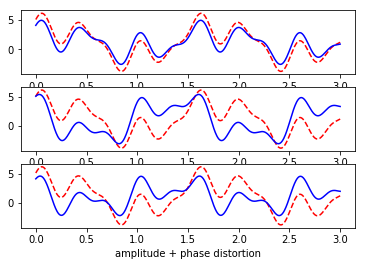

In [47]:
t = numpy.linspace(0,3,num=601)
# original function
y_t0 = 1.2 + 2.0 *numpy.cos(4*t) + 2.0*numpy.sin(4*t) + 1.9 *numpy.cos(12*t) + 1.2 *numpy.sin(20*t)
#distortion of the amplitude of first harmonic
y_t1 = 1.2 + 1.0 *numpy.cos(4*t) + 1.0*numpy.sin(4*t) + 1.9 *numpy.cos(12*t) + 1.2 *numpy.sin(20*t)
#distortion of the phase of first harmonic
y_t2 = 1.2 + 2.0 *numpy.cos(4*t+numpy.pi/2) + 2.0*numpy.sin(4*t+numpy.pi/2) + 1.9 *numpy.cos(12*t) + 1.2 *numpy.sin(20*t)
#distortion of the phase of first harmonic
y_t3 = 1.2 + 1.0 *numpy.cos(4*t+numpy.pi/2) + 1.0*numpy.sin(4*t+numpy.pi/2) + 1.9 *numpy.cos(12*t) + 1.2 *numpy.sin(20*t)

fig, ax = pyplot.subplots(3, 1)
ax[0].plot(t,y_t0,'r--')
ax[0].plot(t,y_t1,'b-')
ax[0].set_xlabel('amplitude distortion')

ax[1].plot(t,y_t0,'r--') 
ax[1].plot(t,y_t2,'b-') 
ax[1].set_xlabel('phase distortion')

ax[2].plot(t,y_t0,'r--') 
ax[2].plot(t,y_t3,'b-') 
ax[2].set_xlabel('amplitude + phase distortion');


#### Images
An image can be considered a two-dimensional signal: $y(t_1,t_2)$. $t_1$ is horizontal dimension, and $t_2$ the vertical. In images, at each pixel $(t_i,t_j)$, the value saved there is the intensity of that pixel.  For now let's work with grayscale images (no color information).  An image can be understood as being a 2D array/matrix of intensities.  

The intensity convention for grayscale is:
\begin{align*}
& y(t_1,t_2) = 0 \quad \text{black} \\
& y(t_1,t_2) = 1 \quad \text{white} \\
& 0 < y(t_1,t_2) < 1 \quad \text{intensity is porportional and linear gray-value}
\end{align*}

In the image folder, you have access to a few images. Let's start with this portrait.


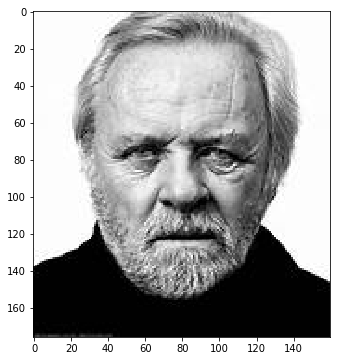

In [48]:
import imageio

# Let's read the image in python

#image = imageio.imread('img/Fourier_gray.png')
#image = imageio.imread('img/CapillaryWaves_2.png')
#image = imageio.imread('img/CapillaryWaves.png')
#image = imageio.imread('img/MegRyan-1.png')
image = imageio.imread('img/AHopkins.png')
#image = imageio.imread('img/Marylin-1.png')

fig = pyplot.figure(figsize=(6,6))
pyplot.imshow(image, cmap='gray');#interpolation='nearest')



#### 2D FFT

Let's plot the spectra of this image.

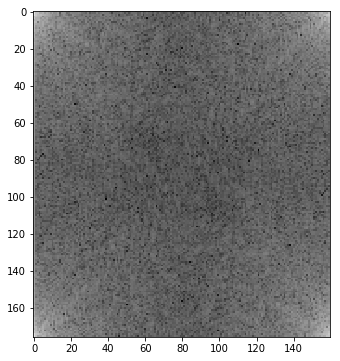

In [49]:
# Let's take the 2D FFT of this image
FF = numpy.fft.fft2(image)
fig = pyplot.figure(figsize=(6,6))
pyplot.imshow(numpy.log(abs(FF)), cmap ='gray');

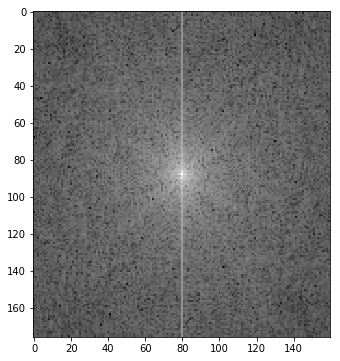

In [50]:
# It is more convenient to display the (0,0) frequency in the center
FF_s = numpy.fft.fftshift(FF)
fig = pyplot.figure(figsize=(6,6))
pyplot.imshow(numpy.log(abs(FF_s)), cmap ='gray');

Let's now calculate the phase of the harmonics.

The phase is calculated with the atan2 function to deal with infinite values.

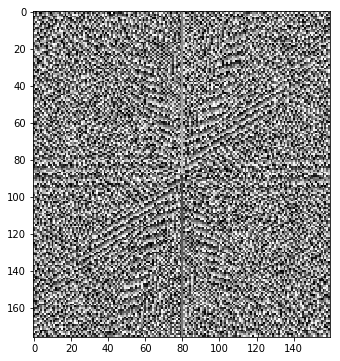

In [51]:
phase = numpy.arctan2(FF.imag,FF.real)
# we are shifting the frequencies to the center for display
phase_s = numpy.fft.fftshift(phase)
fig = pyplot.figure(figsize=(6,6))
pyplot.imshow(phase_s, cmap ='gray');

in summary

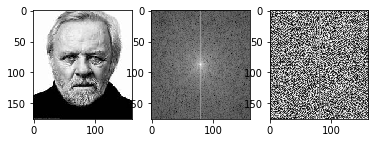

In [52]:
fig, ax = pyplot.subplots(1, 3);
ax[0].imshow(image, cmap='gray')
ax[1].imshow(numpy.log(abs(FF_s)), cmap ='gray')
ax[2].imshow(phase_s, cmap ='gray');

Let's now reconstruct the data using only the amplitude of the Fourier coefficient, setting all the phases = 0.

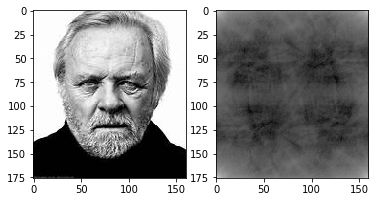

In [53]:
FF_a = FF
FF_a.real = abs(FF)
FF_a.imag = 0
ff_a =  numpy.fft.ifft2(FF_a)

fig,ax = pyplot.subplots(1,2)
ax[0].imshow(image, cmap='gray')
ax[1].imshow(numpy.log(ff_a.real), cmap ='gray');

Now are going to preserve the phases, setting the amplitude of all the harmonics to 1.

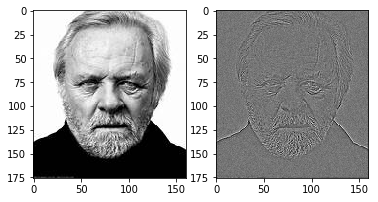

In [54]:
FF_p = FF
FF_p.real = numpy.cos(phase)
FF_p.imag = numpy.sin(phase)
ff_p =  numpy.fft.ifft2(FF_p)

fig,ax = pyplot.subplots(1,2)
ax[0].imshow(image, cmap='gray')
ax[1].imshow(ff_p.real, cmap='gray');

__Magnitude or phase?__

>Which is more important for a given signal?

> Does one component (magnitude or phase) contain more information than the other?

> When filtering, if we had to preserve one component more (between the magnitude and the phase), which one should it be?

## Analog signal reconstruction

If an analog signal is sampled properly, then based on the Nyquist Shannon sampling rate theorem, one can reconstruct it without loss of information from the discrete data.  One method to reconstruct the analog signal is the _cardinal series_.

For $N$ discrete data point, the cardinal series is:
\begin{align*}
y(t) = \frac{1}{\pi} \sum_{n=0}^{N-1} y_d(n \Delta t)\, \frac{\sin \left( \pi \left( \frac{t}{\Delta t} - n \right) \right)}{\frac{t}{\Delta t} - n} 
\end{align*}

For $N\rightarrow \infty$, the cardinal series reconstruct exactly the function $y(t)$.  It still works well for finite number of point.  In fact this series is implemented in most digital oscilloscope to reconstruct the digital signal and make it appear analog on the screen.  One can also do the same when acquiring experimental data, as long as they are sampled in accordance with the Nyquist Shannon theorem.

Let's see an example:
\begin{align*}
y(t) = 1.0 \sin (2 \pi 5 t) + 2.0 \sin (2 \pi 12 t)
\end{align*}

If the sampling rate, $f_s> 24 \,\mathrm{Hz}$, then we can reconstruct the analog signal from the discrete data.

32


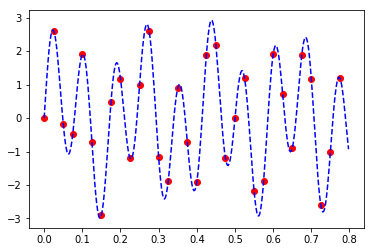

In [55]:
fs = 40 # sampling rate (Hz)
m = 5 # exponent number of point
N = 2**m # number of points
Ts = N/fs # sampling period
print(N)
timestep = 1/fs # time increment (s)
t = numpy.arange(0,Ts,timestep) # time vector
y_t = 1.0*numpy.sin(2*numpy.pi*5*t) + 2.0*numpy.sin(2*numpy.pi*12*t)

pyplot.plot(t, y_t,'ro');
# overplot data to make them look continuous
t0 = numpy.arange(0,Ts,timestep/10)
y_t0 = 1.0*numpy.sin(2*numpy.pi*5*t0) + 2.0*numpy.sin(2*numpy.pi*12*t0)

pyplot.plot(t0, y_t0,'b--');


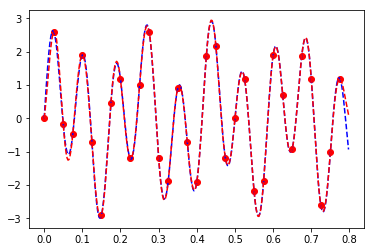

In [56]:
def CardinalSeries(yt, timestep, t):
    ''' Calculate the cardinal series of a discrete function at time t
    Arguments
    ---------
    yt : discretly sampled function
    timestep : time increment of discrete acquisition (s)
    t: time at which to plot the function (s)
    Returns
    -------
    CardinalSeries : continuous function f(t) at time t.
    '''
    N = len(yt)
    nDeltat = numpy.arange(0,N*timestep,timestep)
    yout = numpy.zeros(N)
    eps = 1e-8
    for n in range(N):
        yout[n] = yt[n]*numpy.sin(numpy.pi*(t/timestep - n+eps))/(t/timestep - n+eps)
    y = sum(yout)/numpy.pi
    return y

#yt_a = CardinalSeries(f_t,timestep,0.4)
#print(len(t0))
yt_ana = numpy.zeros(len(t0))
i_index = 0
for i in t0:
    yt_ana[i_index] = CardinalSeries(y_t,timestep,i)
    i_index = i_index+1

pyplot.plot(t, y_t,'ro');
pyplot.plot(t0, y_t0,'b--');
pyplot.plot(t0, yt_ana,'r--');

## Back to thermocouple - MTV data

We now have all the tools to reanalyze the velocimetry combined with thermocouple data to try and develop a model of the thermocouple dynamic response.  From that model, we will be able to infer what the real temperature profile would have been.

![title](img/DCC1_lag_corrected1_raw.png)